<a href="https://colab.research.google.com/github/aureliuszi/LPA2021/blob/master/StarterCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 3 Starter Code

### Purpose:     
The goal of this notebook is to provide students with R code to help them learn some basic functionality when running R in a jupyter notebook. Jupyter notebooks are useful for combining normal text with R code and output (or other types of code, such as Python). For example, you can use jupyter notebooks when creating reports that contain analyses, or when describing and documenting your analyses so others can understand what you've done.

This notebook demonstrates how to use R using a simplified version of data from the Pilgrim Bank (A) case. We will use the full version of the data from this case in tomorrow's class (Class 4).    

The Pilgrim Bank (A) case contains data about bank customers, with each row of data representing an individual customer. The dataset used in the current notebook contains only two variables for a subset of Pilgrim Bank customers. These two variables are: 
* profit99: Annual Profit in 1999 for each customer in dollars
* tenure99: The number of years each individual has been a customer of Pilgrim Bank

### Jupyter Notebooks:
Jupyter Notebooks are organized into **cells**. There are two primary cell types in Jupyter: **code cells** and **markdown cells**.      

The text you're reading now is in a **markdown cell**. Markdown cells contain human language text and allow you to intersperse your R code with written commentary. To create a new markdown cell, go to the menu above, click the "+" button, and then use the nearby dropdown menu to switch from "Code" to "Markdown". After entering text in a markdown cell, you can click the "Run" button above to make your text appear nicely formatted and easy to read, just like this cell you're reading now.         

Below you'll also see slightly shaded cells with "In[ ]" to the left of them. These are **code cells**. The "In[ ]" before a code cell tells you this is code input. When you run a code cell, the code's corresponding output will appear directly below your code. You can run a cell by putting your cursor in the code cell and then clicking the "Run" button in the menu above (or by hitting "Shift + Enter" (Mac) or "Ctrl + Enter" (PC)). You can edit and run the code in a code cell as many times as you'd like, and the new output will simply replace the previous output below the code. This feature allows you to try different commands, models, or other analyses and immediately see the output as you go. To add a new code cell, select the "+" button above, which by default adds a code cell wherever the cursor is in the notebook. 

You can insert a new cell on any line using any of three methods:

* by clicking "+" in the menu above
* by clicking the Insert option in the menu above
* by using the keyboard shortcut "Esc + A" or "Esc + B" to insert a cell above or below respectively

If you're interested in learning more about using jupyter notebook shortcuts, click "Help" in the menu above and navigate to "Keyboard Shortcuts". For additional information, here is a great resource: https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330

### Class Assignment:     
Read through this jupyter notebook and click the "Run" button in the menu above for each code cell to see the output of each R command.

## Section 0: Load data         
Load the data in this project into R by clicking on the code cell immediately below, and then clicking "Run" in the menu above. Note that after running this command, no output will appear until you run the subsequent code cells.

In [ ]:
install.packages("RCurl")
library(RCurl)
library(foreign)
library(dplyr)

url_pilgrim <- "https://raw.githubusercontent.com/aureliuszi/LPA2021/master/Class3/data.csv"
df_pilgrim_url <- getURL(url_pilgrim)
df_pilgrim <- read.csv(textConnection(df_pilgrim_url))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Note that the command above includes an "assignment operator" that looks like a backwards arrow ( <- ). This assigns the data to the right of the operator to the new object (df_pilgrim) to the left of the operator.

After running the cell above, a dataframe called df_pilgrim should now be loaded in your R Environment. You can check to see the variables in your dataframe by loading the first few lines of the dataframe using the 'head' command. This command will display the first six observations of each variable. It is best practice in jupyter notebooks to use the 'head' command after you have loaded a new dataframe in order to ensure the dataset has been loaded correctly. 

In [ ]:
head(df_pilgrim)

,profit99,tenure99
,<int>,<dbl>
1,703,10.25
2,490,5.58
3,460,16.16
4,496,14.66
5,-29,12.08
6,-186,20.83


Another useful way to view the structure of the dataframe is with the 'str' command. Note that this output provides the variable type, for example integers and numeric variables (the latter have decimal places). 

In [ ]:
str(df_pilgrim)

'data.frame':	161 obs. of  2 variables:
 $ profit99: int  703 490 460 496 -29 -186 201 -31 -64 -4 ...
 $ tenure99: num  10.25 5.58 16.16 14.66 12.08 ...


## Section 1: Summarize data            
Run a "summary" command to see basic information about the data.      

In [ ]:
summary(df_pilgrim)

    profit99         tenure99    
 Min.   :-220.0   Min.   : 0.25  
 1st Qu.:  24.0   1st Qu.: 6.41  
 Median : 220.0   Median :11.58  
 Mean   : 316.5   Mean   :12.24  
 3rd Qu.: 549.0   3rd Qu.:17.91  
 Max.   :1761.0   Max.   :31.33  

There are many simple commands to quickly describe a single variable in R. Examples include mean, min, max, sd, range, and quantile. To run a command on a single variable, first specify the command, then in parentheses specify the dataframe, then type "$" to connect the dataframe to a subsequent variable, and then type the variable name.        

In general, to reference a single variable in R:     
* dataframe$variable_name

Use this command to find the mean of profit99:

In [ ]:
mean(df_pilgrim$profit99)

[1] 316.5031

## Section 2: Visualize single variables
Create a histogram of each variable in the dataset.      

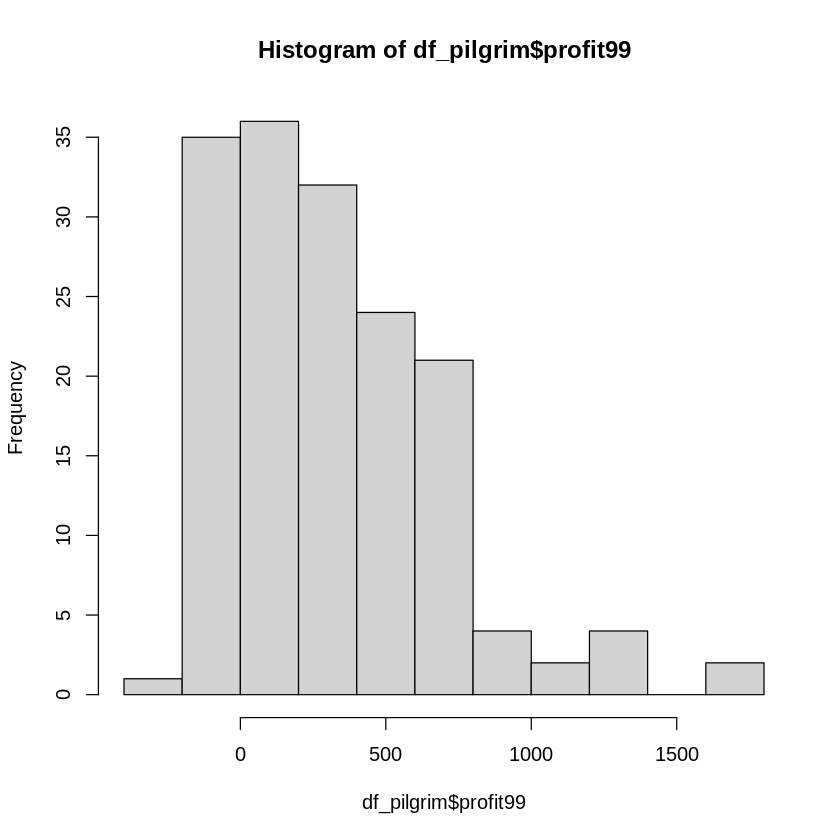

In [ ]:
hist(df_pilgrim$profit99)

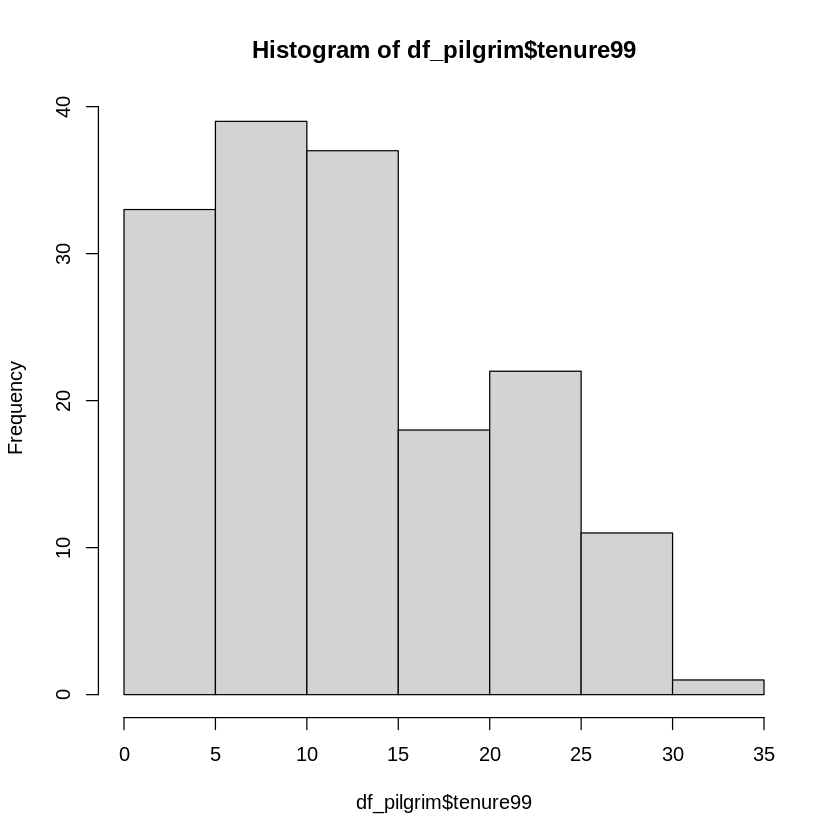

In [ ]:
hist(df_pilgrim$tenure99)

## Section 3: Plot two variables         
Create a scatterplot.    

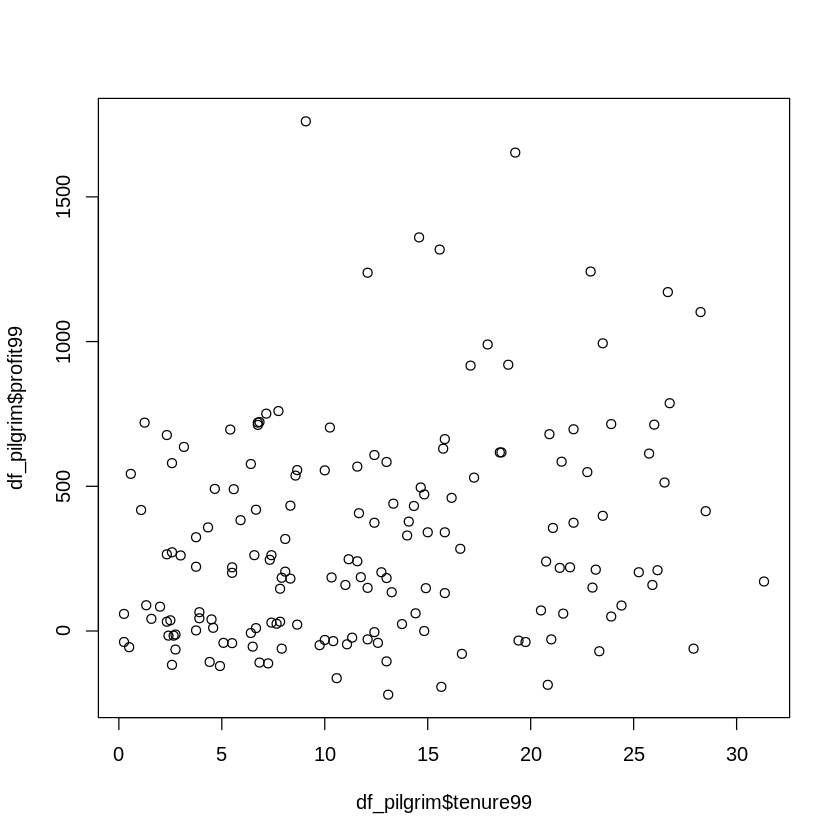

In [ ]:
plot(df_pilgrim$tenure99, df_pilgrim$profit99)

## Section 4: Correlate two variables        
Find the correlation between the variables in the dataset.  

In [ ]:
cor(df_pilgrim)

,profit99,tenure99
profit99,1.0000000,0.2440388
tenure99,0.2440388,1.0000000


## Section 5: Run a regression (also called a linear model)          
Run a linear model using profit99 as the outcome variable (or dependent variable) and tenure99 as the predictor variable (or independent variable).    

In [ ]:
lm(profit99 ~ tenure99, data = df_pilgrim)


Call:
lm(formula = profit99 ~ tenure99, data = df_pilgrim)

Coefficients:
(Intercept)     tenure99  
     172.96        11.73  


Run the linear model again, this time using an assignment operator to save the output to a new data object called "model_1". Note that you will not see any output from model_1 until you call for a summary of this output in the subsequent cell.

In [ ]:
model_1 <- lm(profit99 ~ tenure99, data = df_pilgrim)

View the output of model_1 by "calling" it with the summary command:

In [ ]:
summary(model_1)


Call:
lm(formula = profit99 ~ tenure99, data = df_pilgrim)

Residuals:
    Min      1Q  Median      3Q     Max 
-603.30 -266.15  -81.75  232.37 1481.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  172.962     53.451   3.236  0.00148 **
tenure99      11.730      3.697   3.173  0.00181 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 361.3 on 159 degrees of freedom
Multiple R-squared:  0.05955,	Adjusted R-squared:  0.05364 
F-statistic: 10.07 on 1 and 159 DF,  p-value: 0.00181


## Section 6: Plot two variables and add a regression line           
Add a regression line to a scatterplot of data. 

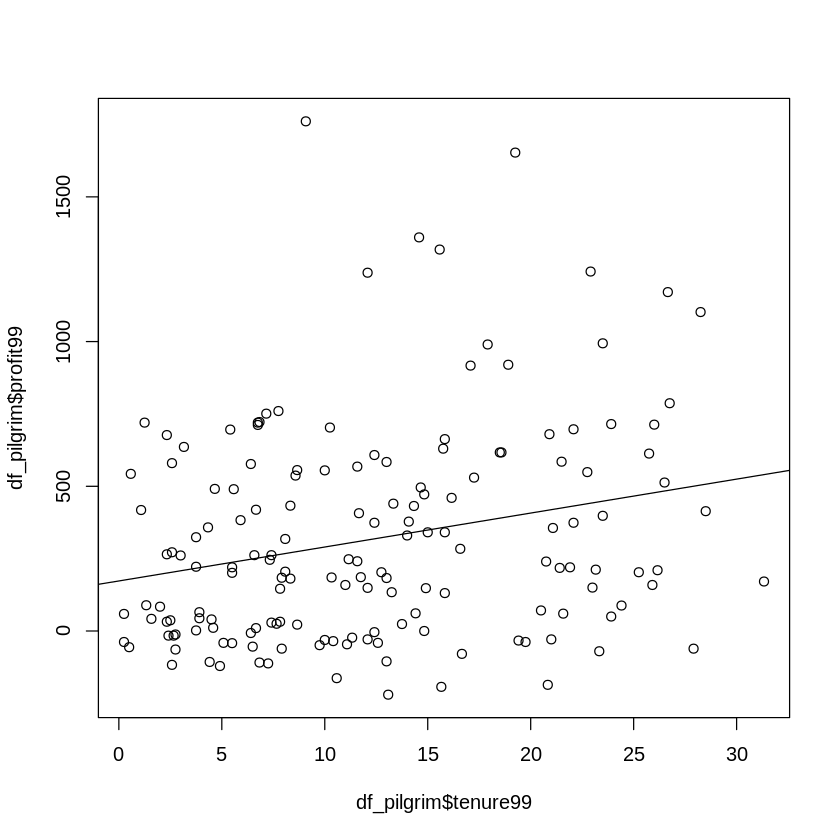

In [ ]:
plot(df_pilgrim$tenure99, df_pilgrim$profit99)
abline(lm(profit99 ~ tenure99, data = df_pilgrim))

## Section 7: Now with packages! 

Now let's do the same things as above but with the dplyr package! From section 0, you may recall that we loaded the dplyr package for efficiency.

## What is a package? 
In R, packages are built on top of base R (what we did before) to allow for easier computation in certain specialized areas. 

You can think of base R as a four-function calculator and packages as applications that expand the calculator's abilities. For example, a graphing package, when installed onto the four-function calculator, would give it the ability to graph.

To load a package, we use the following code:
```
library(package-name)
```
If we haven't installed the package yet, we use the follwoing command to install it.
```
install.packages("package-name")
```
So to install and load dplyer:
```
install.packages("dplyr")
library(dplyr)
```
## What is the dplyr package? 
When it comes to analytics, most academics (and business people!) use the R dplyr package to work with data frames. This is because dplyr is much more efficient at doing certain things. We will explore these things below. 

## Section 8: Write your own code           
Try typing "boxplot(df_pilgrim$profit99)" in the code cell below, and running it. 

Feel free to try other commands and adding cells to get a feel for how a Jupyter notebook works. We will discuss this notebook in Wednesday's class.  